# PSI3471 - Aula de Exercícios 03

# Perceptron de Rosenblatt e Regressão Logística

# Exercício 1

Neste exercício vamos utilizar o neurônio de Rosenblatt para implementar a função lógica AND.

Iniciamos importando as bibliotecas necessárias para implementar o neurônio de Rosenblatt.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema começando pelo AND.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [3]:
Nt = 100  # número de pontos de treinamento

#############
# x deve ser uma matriz com Nt linhas e 2 colunas com valores 0 ou 1 aleatórios,
# que pode ser gerada usando as funções np.round e np.random.uniform.
# d deve ser um vetor coluna com Nt linhas contendo o resultado da função lógica
# AND aplicada ao vetor x. Para isso use a função np.logical_and.
# Note que a função np.logical_and devolve um vetor com elementos do tipo boolean.
# Para transformar os elementos para o tipo inteiro, basta multiplicá-lo por 1
# ou usar o método .astype(int)

x = np.round(np.random.uniform(0, 1, (Nt, 2)), 0)
d = 1 * (np.logical_and(x[:, [0]], x[:, [1]]))
#############

A função a seguir implementa o neurônio de Rosenblatt no modo mini-batch. Modifique o programa do algoritmo LMS no modo mini- inserindo a função de ativação.
Para obter 0 ou 1 na saída, deve-se usar a função degrau em vez da função sinal. Para isso, use a função `np.heaviside`.
Uma outra modificação que deve ser considerada é a inicialização dos pesos e bias, que agora devem ser inicializados com valores aleatórios uniformemente distribuídos no intervalo [-dw, dw].

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [4]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """


    M = x.shape[1]
    Nmb = int(Nt / Nb)
    W = np.random.uniform(-dw, dw, ((Ne * Nmb + 1, M + 1)))
    Xd = np.hstack((np.ones((Nt, 1)), x, d))
    eta = eta / Nb

    W[0] = 0

    for k in range(Ne):

      np.random.shuffle(Xd)
      x = Xd[:, 0 : M + 1]
      d = Xd[:, [M + 1]]

      for l in range(Nmb):
        dmb = d[l * Nb : (l + 1) * Nb]
        xmb = x[l * Nb : (l + 1) * Nb, :]
        m = k*Nmb + l
        v = xmb @ W[[m], :].T
        y = np.heaviside(v,1)
        emb = dmb - y
        g = xmb.T @ emb
        W[[m + 1], :] = W[[m], :] + eta * g.T

    return W

In [14]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

#############  Complete o código a seguir
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

#Wfinal deve ser os valores de pesos e bias da última iteração

Wfinal = W[Ne * int(Nt / Nb)]

print(Wfinal)
#############

[-0.4    0.275  0.25 ]


<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

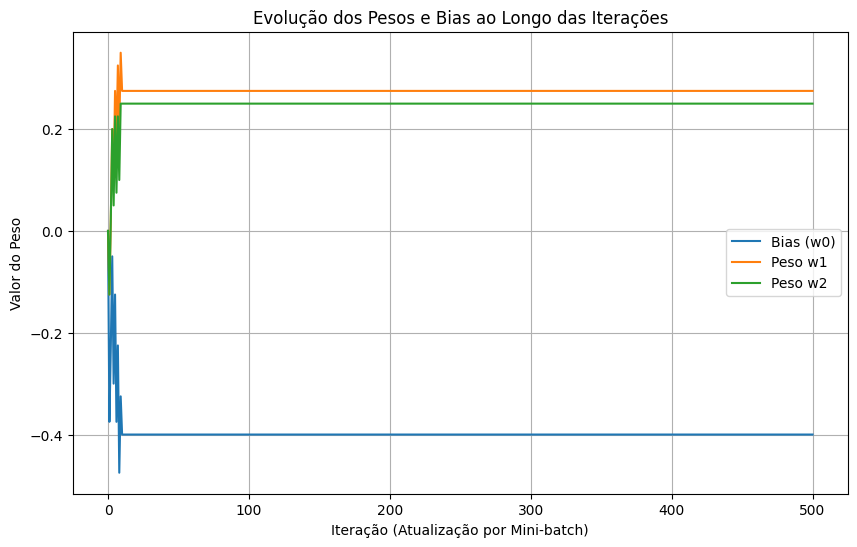

In [15]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações]
iteracoes = np.arange(W.shape[0])

# Cria a figura e os eixos para o gráfico
plt.figure(figsize=(10, 6))

# Plota a evolução de cada coluna de W (bias e pesos)
plt.plot(iteracoes, W[:, 0], label='Bias (w0)')
plt.plot(iteracoes, W[:, 1], label='Peso w1')
plt.plot(iteracoes, W[:, 2], label='Peso w2')

# Adiciona legendas, título e grade para melhor visualização
plt.title('Evolução dos Pesos e Bias ao Longo das Iterações')
plt.xlabel('Iteração (Atualização por Mini-batch)')
plt.ylabel('Valor do Peso')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [16]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

x_test = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Saídas desejadas (d) para a porta AND
d_test = np.array([0, 0, 0, 1])

# 2. Classificar os dados de teste com o neurônio treinado
# Adicionar a coluna de bias (valor 1) às entradas
x_test_bias = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

# Calcular a saída do neurônio (net input)
net_input = x_test_bias @ Wfinal.T

# Aplicar a função de ativação degrau (step function)
# y = 1 se net_input >= 0, senão y = 0
y_pred = np.where(net_input >= 0, 1, 0)

# 3. Calcular a taxa de erro
erros = np.sum(y_pred != d_test)
taxa_de_erro = (erros / len(d_test)) * 100

# Imprimir os resultados
print(f"Pesos Finais (Wfinal): {Wfinal}")
print("-" * 30)
print("Avaliação da Porta Lógica AND:")
for i in range(len(x_test)):
    print(f"Entrada: {x_test[i]} | Saída Desejada: {d_test[i]} | Saída Prevista: {y_pred[i]}")
print("-" * 30)
print(f"Número de erros: {erros}")
print(f"Taxa de erro: {taxa_de_erro:.2f}%")


Pesos Finais (Wfinal): [-0.4    0.275  0.25 ]
------------------------------
Avaliação da Porta Lógica AND:
Entrada: [0 0] | Saída Desejada: 0 | Saída Prevista: 0
Entrada: [0 1] | Saída Desejada: 0 | Saída Prevista: 0
Entrada: [1 0] | Saída Desejada: 0 | Saída Prevista: 0
Entrada: [1 1] | Saída Desejada: 1 | Saída Prevista: 1
------------------------------
Número de erros: 0
Taxa de erro: 0.00%


# Exercício 2

Repita o exercício anterior considerando as portas lógicas OR e o XOR.

## Resolução

In [8]:
d_or = 1 * (np.logical_or(x[:, [0]], x[:, [1]]))
d_xor = 1 * (np.logical_xor(x[:, [0]], x[:, [1]]))

W_or = Rosenblatt_minibatch(x, d_or, eta, Nt, Ne, Nb, dw)
W_xor = Rosenblatt_minibatch(x, d_xor, eta, Nt, Ne, Nb, dw)

# Exercício 3

Repita o exercício para as portas lógicas AND, OR e XOR considerando a otimização do modelo utilizando a regressão logística com as seguintes funções custo:
- Erro quadrático médio
- Entropia cruzada

## Resolução

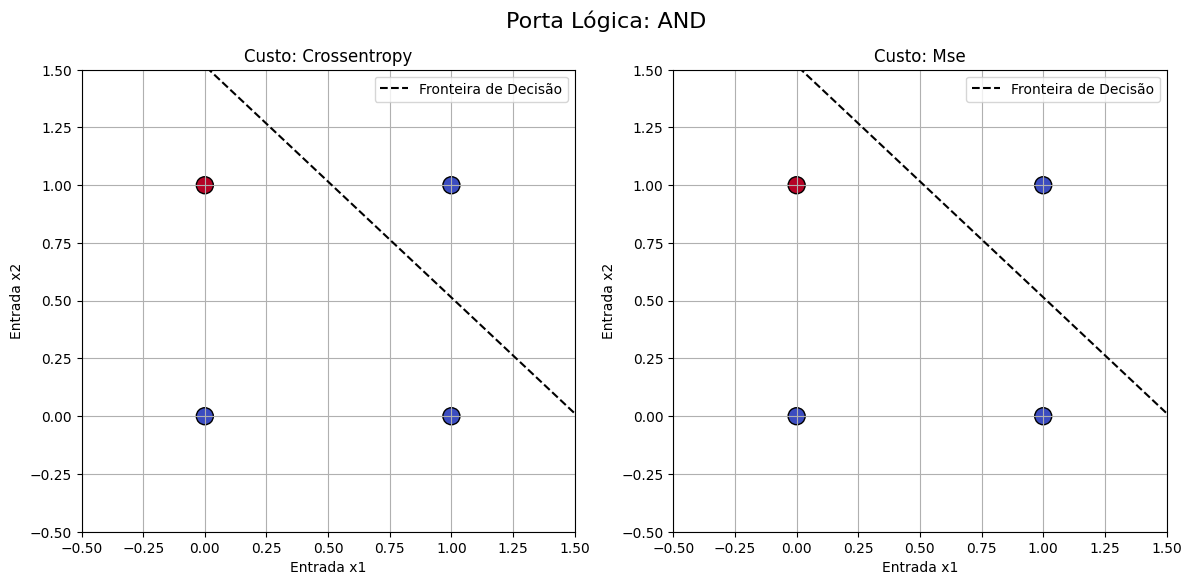

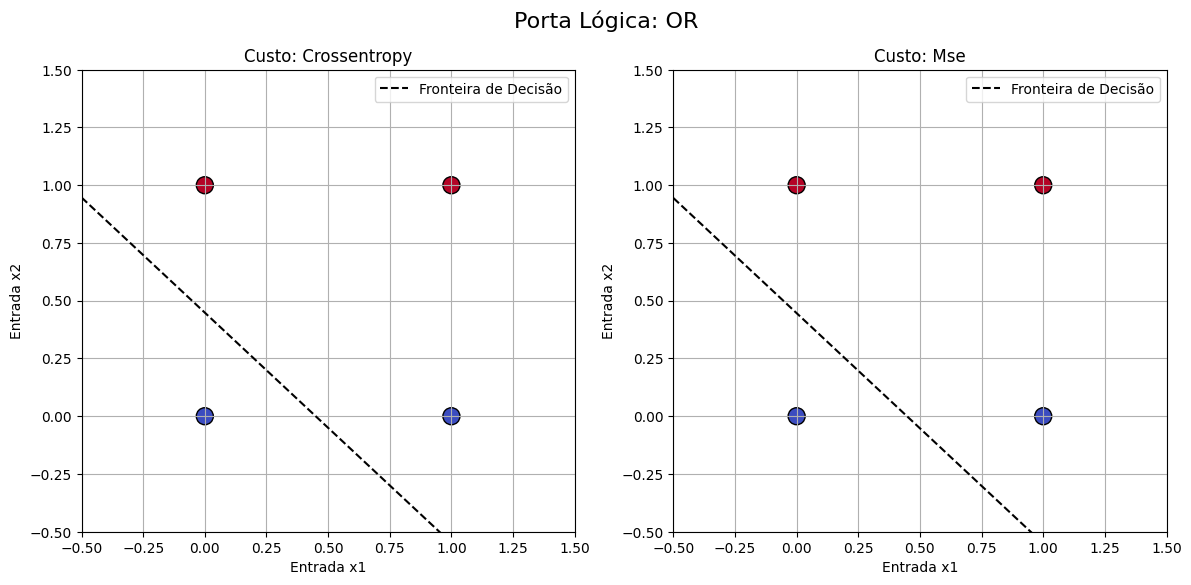

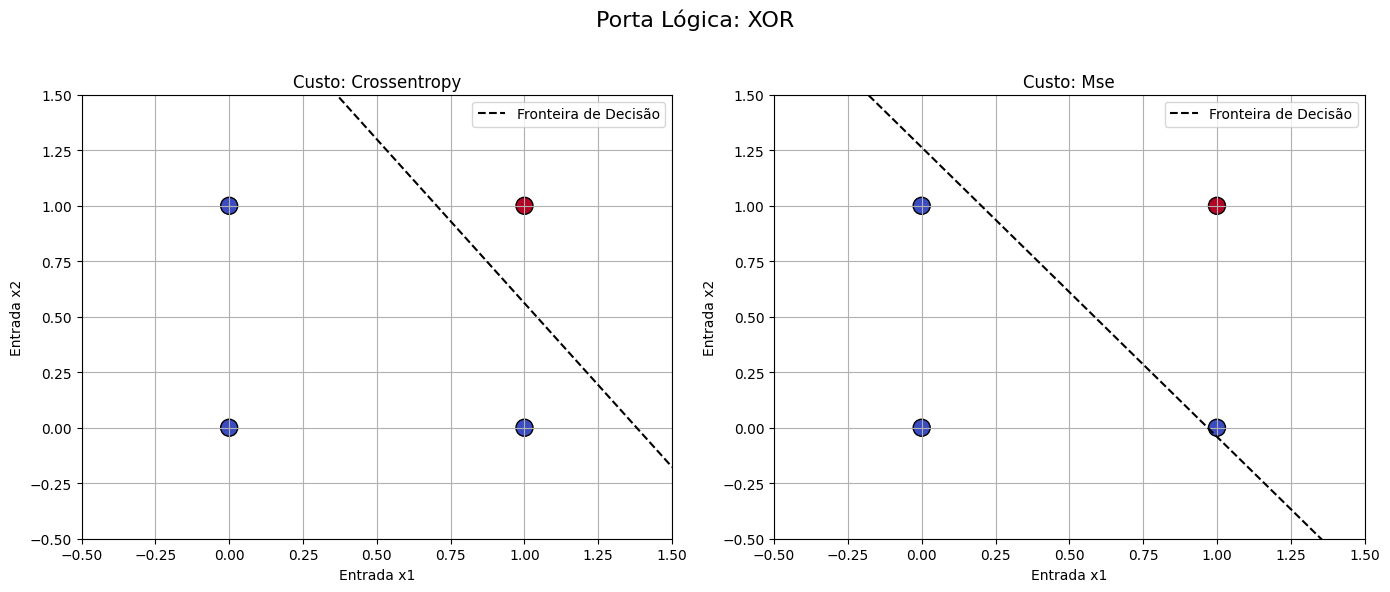

In [17]:
# Função de ativação sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função principal de treinamento para Regressão Logística
def LogisticRegression_minibatch(x, d, eta, Nt, Ne, Nb, cost_function='crossentropy'):
    # Adiciona a coluna de bias (valor 1) às entradas
    x_bias = np.hstack((np.ones((Nt, 1)), x))

    dw = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = np.zeros((1, dw + 1)) # Inicia com um único vetor de pesos

    # Loop de treinamento
    for k in range(Ne):
        # Embaralha os dados a cada época
        indices = np.random.permutation(Nt)
        x_shuffled = x_bias[indices]
        d_shuffled = d[indices]

        for l in range(Nmb):
            # Seleciona o mini-batch
            x_mb = x_shuffled[l * Nb : (l + 1) * Nb]
            d_mb = d_shuffled[l * Nb : (l + 1) * Nb]

            # 1. Calcula a predição (forward pass)
            z = x_mb @ W.T
            y = sigmoid(z)

            # 2. Calcula o gradiente baseado na função de custo
            if cost_function == 'crossentropy':
                gradient = (1/Nb) * (y - d_mb).T @ x_mb
            elif cost_function == 'mse':
                # Note o termo extra: y * (1 - y), que é a derivada da sigmoide
                error_term = (y - d_mb) * y * (1 - y)
                gradient = (1/Nb) * error_term.T @ x_mb
            else:
                raise ValueError("Função de custo não suportada. Use 'crossentropy' ou 'mse'.")

            # 3. Atualiza os pesos (gradiente descendente)
            W = W - eta * gradient

    return W

# --- Script Principal para Execução ---

# Parâmetros de treinamento
Nt = 1000
eta = 0.5
Ne = 200
Nb = 50

# Gera dados de entrada aleatórios
x_train = np.round(np.random.uniform(0, 1, (Nt, 2)), 0)

# Define as portas lógicas e as funções de custo a serem testadas
gates = {
    'AND': 1 * np.logical_and(x_train[:, [0]], x_train[:, [1]]),
    'OR':  1 * np.logical_or(x_train[:, [0]], x_train[:, [1]]),
    'XOR': 1 * np.logical_xor(x_train[:, [0]], x_train[:, [1]])
}
cost_functions = ['crossentropy', 'mse']

# Dados de teste para visualização (a tabela verdade completa)
x_test = np.array([[0,0], [0,1], [1,0], [1,1]])

# Loop para treinar e plotar para cada combinação
for gate_name, d_train in gates.items():

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Porta Lógica: {gate_name}', fontsize=16)

    for i, cost in enumerate(cost_functions):
        # Treina o modelo
        Wfinal = LogisticRegression_minibatch(x_train, d_train, eta, Nt, Ne, Nb, cost_function=cost)

        # Plotagem
        ax = axs[i]
        ax.set_title(f'Custo: {cost.capitalize()}')

        # Plota os pontos da tabela verdade
        d_test = gates[gate_name][:4] # Apenas para colorir os pontos
        ax.scatter(x_test[:,0], x_test[:,1], c=d_test.ravel(), cmap='coolwarm', s=150, edgecolors='k')

        # Desenha a fronteira de decisão (z=0)
        w0, w1, w2 = Wfinal.ravel()
        x1_vals = np.array([-0.5, 1.5])
        x2_vals = (-w0 - w1 * x1_vals) / w2
        ax.plot(x1_vals, x2_vals, 'k--', label='Fronteira de Decisão')

        ax.set_xlim(-0.5, 1.5)
        ax.set_ylim(-0.5, 1.5)
        ax.set_xlabel('Entrada x1')
        ax.set_ylabel('Entrada x2')
        ax.grid(True)
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()